<a href="https://colab.research.google.com/github/constan1/VoiceMetrics/blob/main/VoiceComparrison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install pysptk

import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import pysptk
from scipy.signal import lfilter
import scipy.signal
import wave
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# SECTION 1: FILE SETUP

In [61]:
file1 = 'data/en-AU-Neural2-A_English.wav'
file2 = 'data/en-AU-Neural2-C_English.wav'
groundtruth = 'data/main/Aashir_Original.wav'
ground_truth = os.path.basename(groundtruth)
first_file = os.path.basename(file1)


# SECTION 2: MEL SPECTORGRAM SIMILARITY`

Similarity score: 0.47026208
Mean Frequency Difference: 668.8581113116404 hz
Maximum Frequency Difference: 2555.768227091329 hz
Minimum Frequency Difference: 0.0 hz
Standard Deviation of Frequency Difference: 615.0481752551038 hz


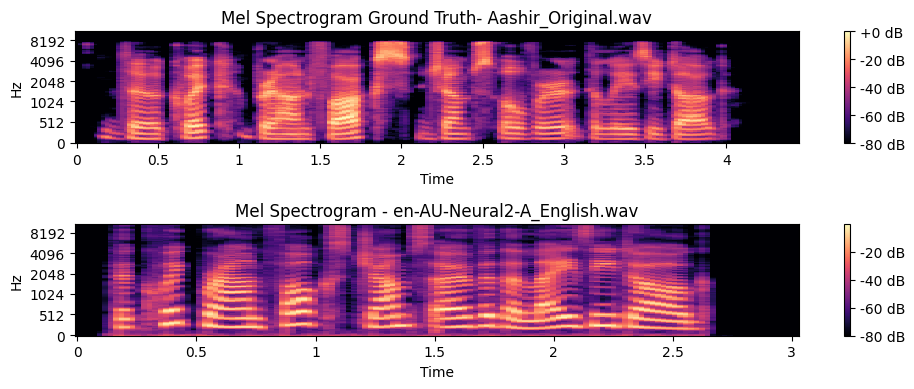

In [62]:

## Section 1: Audio Melspectrogram

def compare_speakers(audio_file1, audio_file2):
    # Load audio files
    audio1, sr1 = librosa.load(audio_file1)
    audio2, sr2 = librosa.load(audio_file2)


    # Preprocessing steps if needed

    # Extract features
    mfcc1 = librosa.feature.mfcc(y=audio1, sr=sr1)
    mfcc2 = librosa.feature.mfcc(y=audio2, sr=sr2)

    # Calculate similarity metrics
    similarity = cosine_similarity(mfcc1, mfcc2)
    frequency_difference = calculate_frequency_difference(mfcc1, mfcc2)

    # Output the metrics
    print("Similarity score:", similarity)
    # Assuming freq_diff is the array of frequency differences
    mean_freq_diff = np.mean(frequency_difference)
    max_freq_diff = np.max(frequency_difference)
    min_freq_diff = np.min(frequency_difference)
    std_freq_diff = np.std(frequency_difference)

    print(f"Mean Frequency Difference: {mean_freq_diff} hz")
    print(f"Maximum Frequency Difference: {max_freq_diff} hz")
    print(f"Minimum Frequency Difference: {min_freq_diff} hz")
    print(f"Standard Deviation of Frequency Difference: {std_freq_diff} hz")


    mel_spectrogram1 = librosa.feature.melspectrogram(y=audio1, sr=sr1)
    mel_spectrogram2 = librosa.feature.melspectrogram(y=audio2, sr=sr2)

    plt.figure(figsize=(10, 4))
    plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.power_to_db(mel_spectrogram1, ref=np.max), y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram Ground Truth- '+ ground_truth)

    plt.subplot(2, 1, 2)
    librosa.display.specshow(librosa.power_to_db(mel_spectrogram2, ref=np.max), y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram - ' + first_file)

    plt.tight_layout()
    plt.show()



def cosine_similarity(x, y):
    # Calculate cosine similarity between two vectors
    x_flat = x.flatten()
    y_flat = y.flatten()

    # Ensure the arrays have compatible shapes
    min_length = min(len(x_flat), len(y_flat))
    x_flat = x_flat[:min_length]
    y_flat = y_flat[:min_length]

    dot_product = np.dot(x_flat, y_flat)
    norm_x = np.linalg.norm(x_flat)
    norm_y = np.linalg.norm(y_flat)
    similarity = dot_product / (norm_x * norm_y)
    return similarity

def calculate_frequency_difference(mfcc1, mfcc2):
    mean_frequency1 = librosa.feature.spectral_centroid(S=abs(mfcc1))
    mean_frequency2 = librosa.feature.spectral_centroid(S=abs(mfcc2))

    min_frames = min(mean_frequency1.shape[1], mean_frequency2.shape[1])
    mean_frequency1 = mean_frequency1[:, :min_frames]
    mean_frequency2 = mean_frequency2[:, :min_frames]

    frequency_difference = abs(mean_frequency1 - mean_frequency2)

    return frequency_difference





# Usage example
compare_speakers(groundtruth, file1)


# SECTION 3: COMPARING WAVFORMS

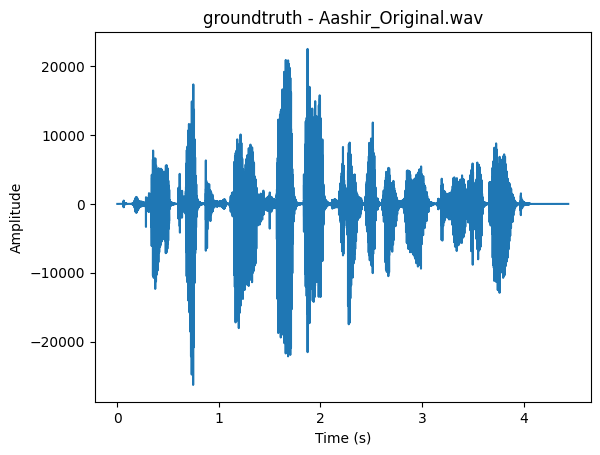

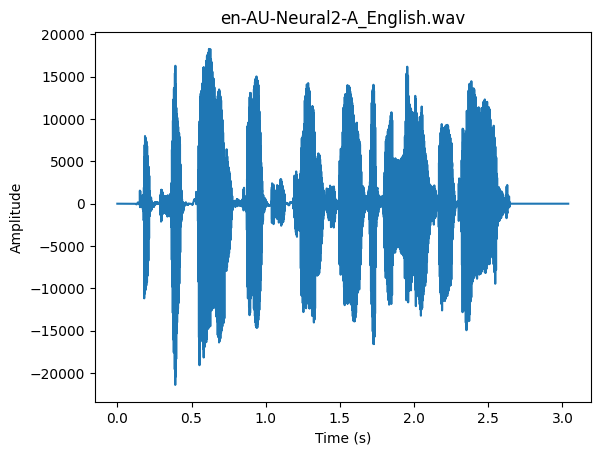

In [63]:

def ground_truth_wavform():
   with wave.open(groundtruth, 'rb') as wav_file:
            # Get audio file properties
            sample_width = wav_file.getsampwidth()
            num_channels = wav_file.getnchannels()
            frame_rate = wav_file.getframerate()
            num_frames = wav_file.getnframes()

            # Read audio data
            audio_data = wav_file.readframes(num_frames)

            # Convert audio data to a numpy array
            audio_samples = np.frombuffer(audio_data, dtype=np.int16)

            # Calculate the duration of the audio file
            duration = num_frames / frame_rate

            # Create the time axis
            time = np.linspace(0, duration, num=num_frames)

            # Plot the waveform
            plt.plot(time, audio_samples)
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')
            plt.title(os.path.basename(f"groundtruth - {ground_truth}"))
            plt.subplots_adjust(hspace=2)
            plt.show()


def compared_wavform(file1):
   with wave.open(file1, 'rb') as wav_file:
            # Get audio file properties
            sample_width = wav_file.getsampwidth()
            num_channels = wav_file.getnchannels()
            frame_rate = wav_file.getframerate()
            num_frames = wav_file.getnframes()

            # Read audio data
            audio_data = wav_file.readframes(num_frames)

            # Convert audio data to a numpy array
            audio_samples = np.frombuffer(audio_data, dtype=np.int16)

            # Calculate the duration of the audio file
            duration = num_frames / frame_rate

            # Create the time axis
            time = np.linspace(0, duration, num=num_frames)

            # Plot the waveform
            plt.plot(time, audio_samples)
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')
            plt.title(os.path.basename(file1))
            plt.subplots_adjust(hspace=2)
            plt.show()



ground_truth_wavform()
compared_wavform(file1)



# SECTION 4: FORMANT EXTRACTION

Formants represent the resonant frequencies of the vocal characteristics during speech production

Similarity score for Formant 1: 0.010757926945376469
Similarity score for Formant 2: 0.0022209076550284094
Similarity score for Formant 3: 0.0024144195549121294
Similarity score for Formant 4: 0.0007326101669692976
Similarity score for Formant 5: 0.0005577715718427759
Overall similarity score: 0.0033367271788258164


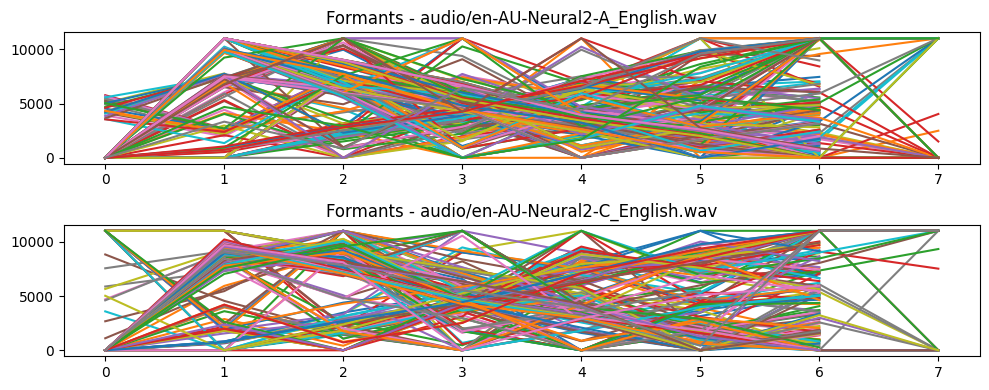

In [64]:
def compareFormatExtractions(audio1,audio2):

    audio_file1, sr1 = librosa.load(audio1)
    audio2_file2, sr2 = librosa.load(audio2)

    formants1 = extract_formants(audio_file1, sr1)
    formants2 = extract_formants(audio2_file2, sr2)
    num_formants = min(formants1.shape[0], formants2.shape[0])
    similarity_scores = []

    for i in range(num_formants):
        formant1 = formants1[i]
        formant2 = formants2[i]
        similarity = calculate_similarity(formant1, formant2)
        similarity_scores.append(similarity)

        print(f"Similarity score for Formant {i+1}: {similarity}")

    # Overall similarity score (average of formant similarities)
    overall_similarity = np.mean(similarity_scores)
    print("Overall similarity score:", overall_similarity)
    formatEtractions(audio_file1,audio2_file2,sr1,sr2)


def extract_formants(audio, sr, order=10, num_formants=5):
    # Apply LPC analysis
    lpc_coeffs = librosa.lpc(audio, order=10)

    # Compute the roots of the LPC polynomial
    roots = np.roots(lpc_coeffs)

    # Select the roots corresponding to formants
    formant_roots = roots[np.imag(roots) >= 0]

    # Sort the roots by their frequencies (ascending order)
    sorted_roots = sorted(formant_roots, key=lambda r: np.angle(r))

    # Compute the formant frequencies
    formant_freqs = np.arctan2(np.imag(sorted_roots), np.real(sorted_roots)) * (sr / (2 * np.pi))

    # Return the first `num_formants` frequencies
    formants = np.array(formant_freqs[:num_formants])

    return formants


def formatEtractions(audio1, audio2,sr1,sr2 ):
   # Extract formants using LPC
    order = 12  # LPC order
    frame_length = int(0.025 * sr1)  # Frame length in samples
    hop_length = int(0.010 * sr1)  # Hop length in samples

    formants1 = []
    formants2 = []

    vad_segments = librosa.effects.split(audio1, top_db=20)

    for segment_start, segment_end in vad_segments:
        segment = audio1[segment_start:segment_end]

        for i in range(0, len(segment) - frame_length, hop_length):
            frame = segment[i:i + frame_length]

            # Apply pre-emphasis filter to the frame
            pre_emphasized_frame = scipy.signal.lfilter([1, -0.97], 1, frame)

            # Apply windowing to the frame
            windowed_frame = pre_emphasized_frame * scipy.signal.hamming(len(pre_emphasized_frame))

            lpc_coeffs = pysptk.lpc(windowed_frame, order)
            # Extract formants from LPC coefficients
            roots = np.roots(lpc_coeffs)
            formants = roots[roots.imag >= 0]
            frequencies = np.arctan2(formants.imag, formants.real) * (sr1 / (2 * np.pi))
            formants1.append(frequencies)

    vad_segments = librosa.effects.split(audio2, top_db=20)

    for segment_start, segment_end in vad_segments:
        segment = audio2[segment_start:segment_end]

        for i in range(0, len(segment) - frame_length, hop_length):
            frame = segment[i:i + frame_length]

            # Apply pre-emphasis filter to the frame
            pre_emphasized_frame = scipy.signal.lfilter([1, -0.97], 1, frame)

            # Apply windowing to the frame
            windowed_frame = pre_emphasized_frame * scipy.signal.hamming(len(pre_emphasized_frame))

            lpc_coeffs = pysptk.lpc(windowed_frame, order)
            # Extract formants from LPC coefficients
            roots = np.roots(lpc_coeffs)
            formants = roots[roots.imag >= 0]
            frequencies = np.arctan2(formants.imag, formants.real) * (sr2 / (2 * np.pi))
            formants2.append(frequencies)


    # Plot formants
    plt.figure(figsize=(10, 4))
    plt.subplot(2, 1, 1)
    for formants in formants1:
        plt.plot(formants)
    plt.title('Formants - audio/en-AU-Neural2-A_English.wav')

    plt.subplot(2, 1, 2)
    for formants in formants2:
        plt.plot(formants)
    plt.title('Formants - audio/en-AU-Neural2-C_English.wav')

    plt.tight_layout()
    plt.show()

def calculate_similarity(formants1, formants2):

    # Compute the Euclidean distance between the formant vectors

    formants1 = np.asarray(formants1)
    formants2 = np.asarray(formants2)

    formants1 = np.squeeze(formants1)
    formants2 = np.squeeze(formants2)
    distance = np.linalg.norm(formants1 - formants2)

    # Calculate the similarity score
    similarity = 1 / (1 + distance)

    return similarity

compareFormatExtractions(groundtruth,file1)